In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
from matplotlib.backends.backend_pdf import PdfPages
import os

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
adata = sc.read_h5ad('/vol/ExtraVol/LP_FSCs_clustered.h5ad')

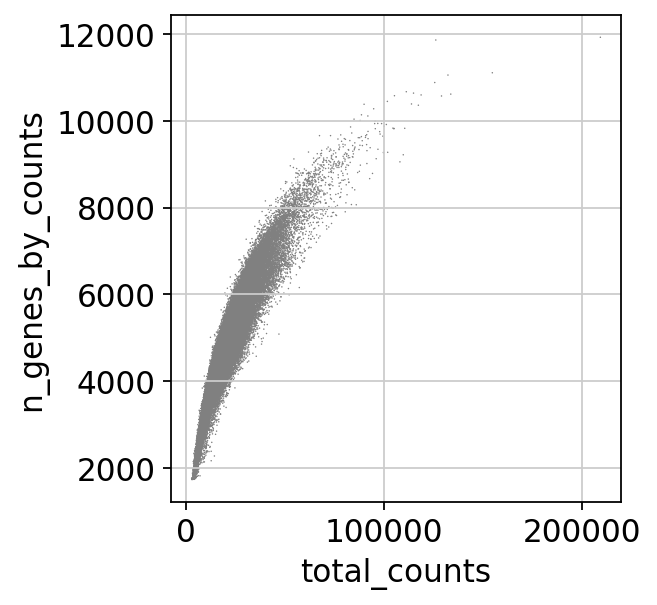

In [4]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


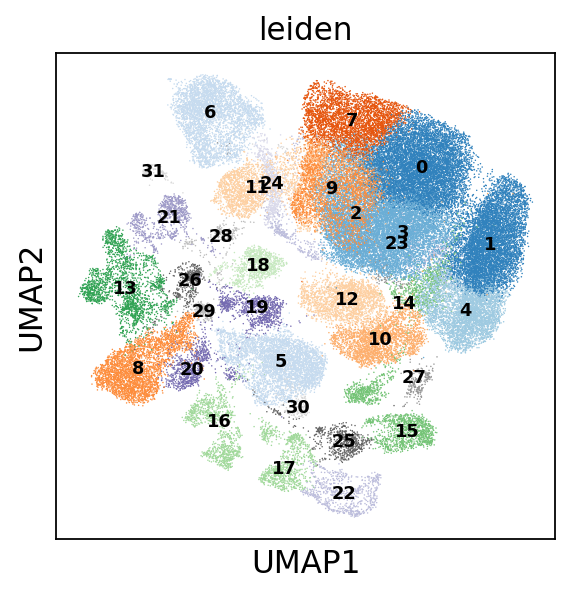

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


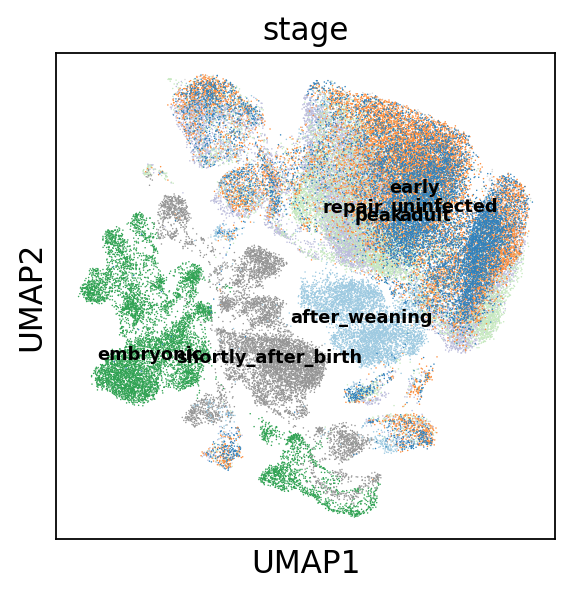

In [5]:
sc.pl.umap(adata, color=['leiden'], use_raw=False, palette = "tab20c", legend_loc = "on data", legend_fontsize = 8)
sc.pl.umap(adata, color=['stage'], use_raw=False, palette = "tab20c", legend_loc = "on data", legend_fontsize = 8)

In [21]:
adata.obs['cell_type'] = pd.Categorical([None] * adata.n_obs, categories=[])

In [22]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['neuronal_glial_cells'])

# Define the clusters of interest
clusters_of_interest = {'15', '17', '22', '25', '27'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'neuronal_glial_cells'

In [23]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['pericytes'])

# Define the clusters of interest
clusters_of_interest = {'16'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'pericytes'

In [24]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['myofibroblasts_1'])

# Define the clusters of interest
clusters_of_interest = {'11'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'myofibroblasts_1'

In [ ]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['myofibroblasts_2'])

# Define the clusters of interest
clusters_of_interest = {'28'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'myofibroblasts_2'

In [25]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['myofibroblasts_smooth_muscle'])

# Define the clusters of interest
clusters_of_interest = {'21'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'myofibroblasts_smooth_muscle'

In [26]:
# Add 'ilf_or_lto' to the categories of the 'cell_type' column
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['ilf_or_lto'])

# Define the clusters of interest
clusters_of_interest = {'30'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'ilf_or_lto'

In [27]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['smooth_muscle'])

# Define the clusters of interest
clusters_of_interest = {'31'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'smooth_muscle'

In [28]:
print(adata.obs['cell_type'].cat.categories)

Index(['neuronal_glial_cells', 'pericytes', 'myofibroblasts',
       'myofibroblasts_smooth_muscle', 'ilf_or_lto', 'smooth_muscle'],
      dtype='object')


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


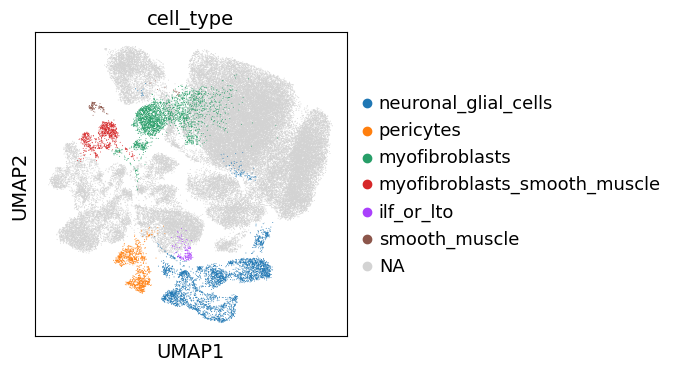

In [29]:
sc.pl.umap(adata, color = ["cell_type"], use_raw=False, cmap = "inferno")

In [30]:
# Create a boolean mask for all cells that do not have 'neuronal_glial_cells' as their cell_type
non_neuronal_glial_mask = adata.obs['cell_type'] != 'neuronal_glial_cells'

# Subset the AnnData object to keep only the cells that do not have 'neuronal_glial_cells' as their cell_type
adata = adata[non_neuronal_glial_mask].copy()

print(adata.obs['cell_type'].cat.categories)

Index(['pericytes', 'myofibroblasts', 'myofibroblasts_smooth_muscle',
       'ilf_or_lto', 'smooth_muscle'],
      dtype='object')


normalizing counts per cell
    finished (0:00:01)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


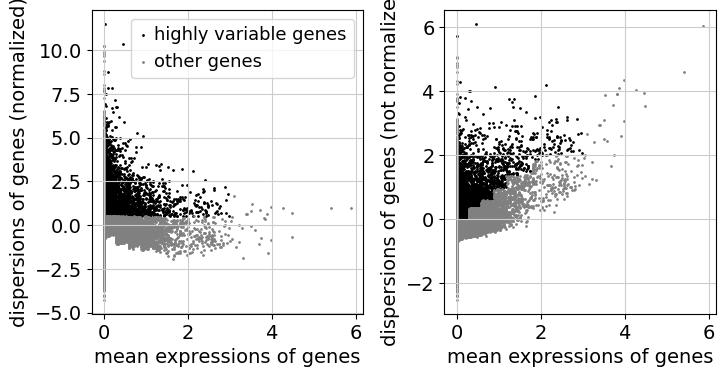

In [31]:
adata.uns['log1p']["base"] = None
sc.pp.normalize_total(adata, target_sum=1e4, layer="raw_counts" )
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:56)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


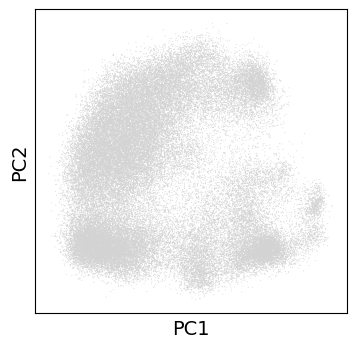

In [32]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)

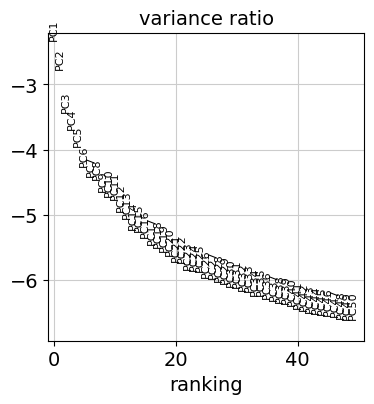

In [33]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [34]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:27)


In [35]:
sc.tl.leiden(adata, resolution = 0.8)

running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:13)


In [36]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga', min_dist=0.5)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:24)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


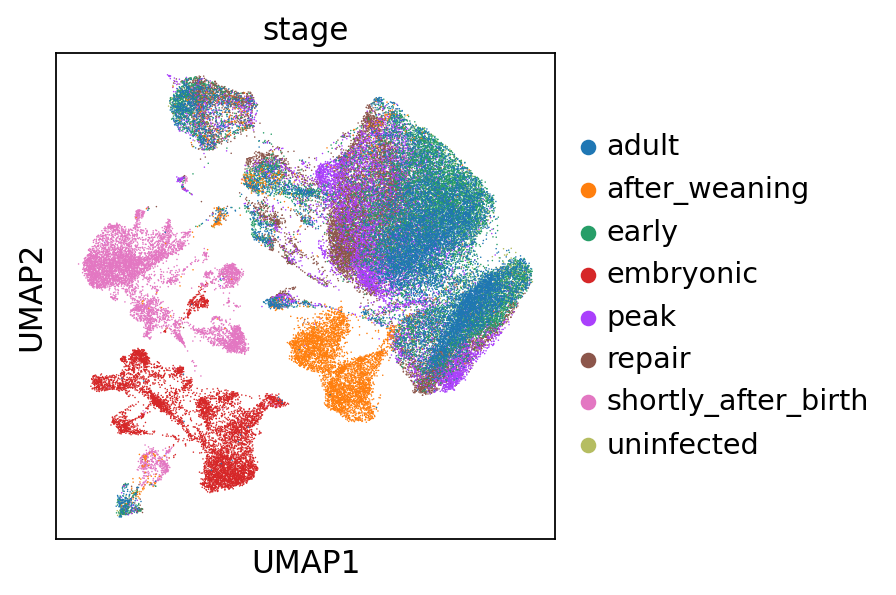

In [45]:
sc.pl.umap(adata, color = "stage", use_raw=False)

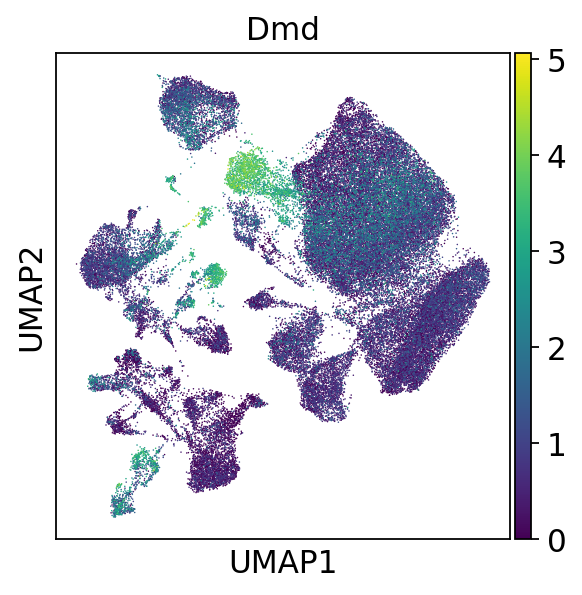

In [47]:
sc.pl.umap(adata, color = ["Dmd"], use_raw=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:05:48)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:399: Perform

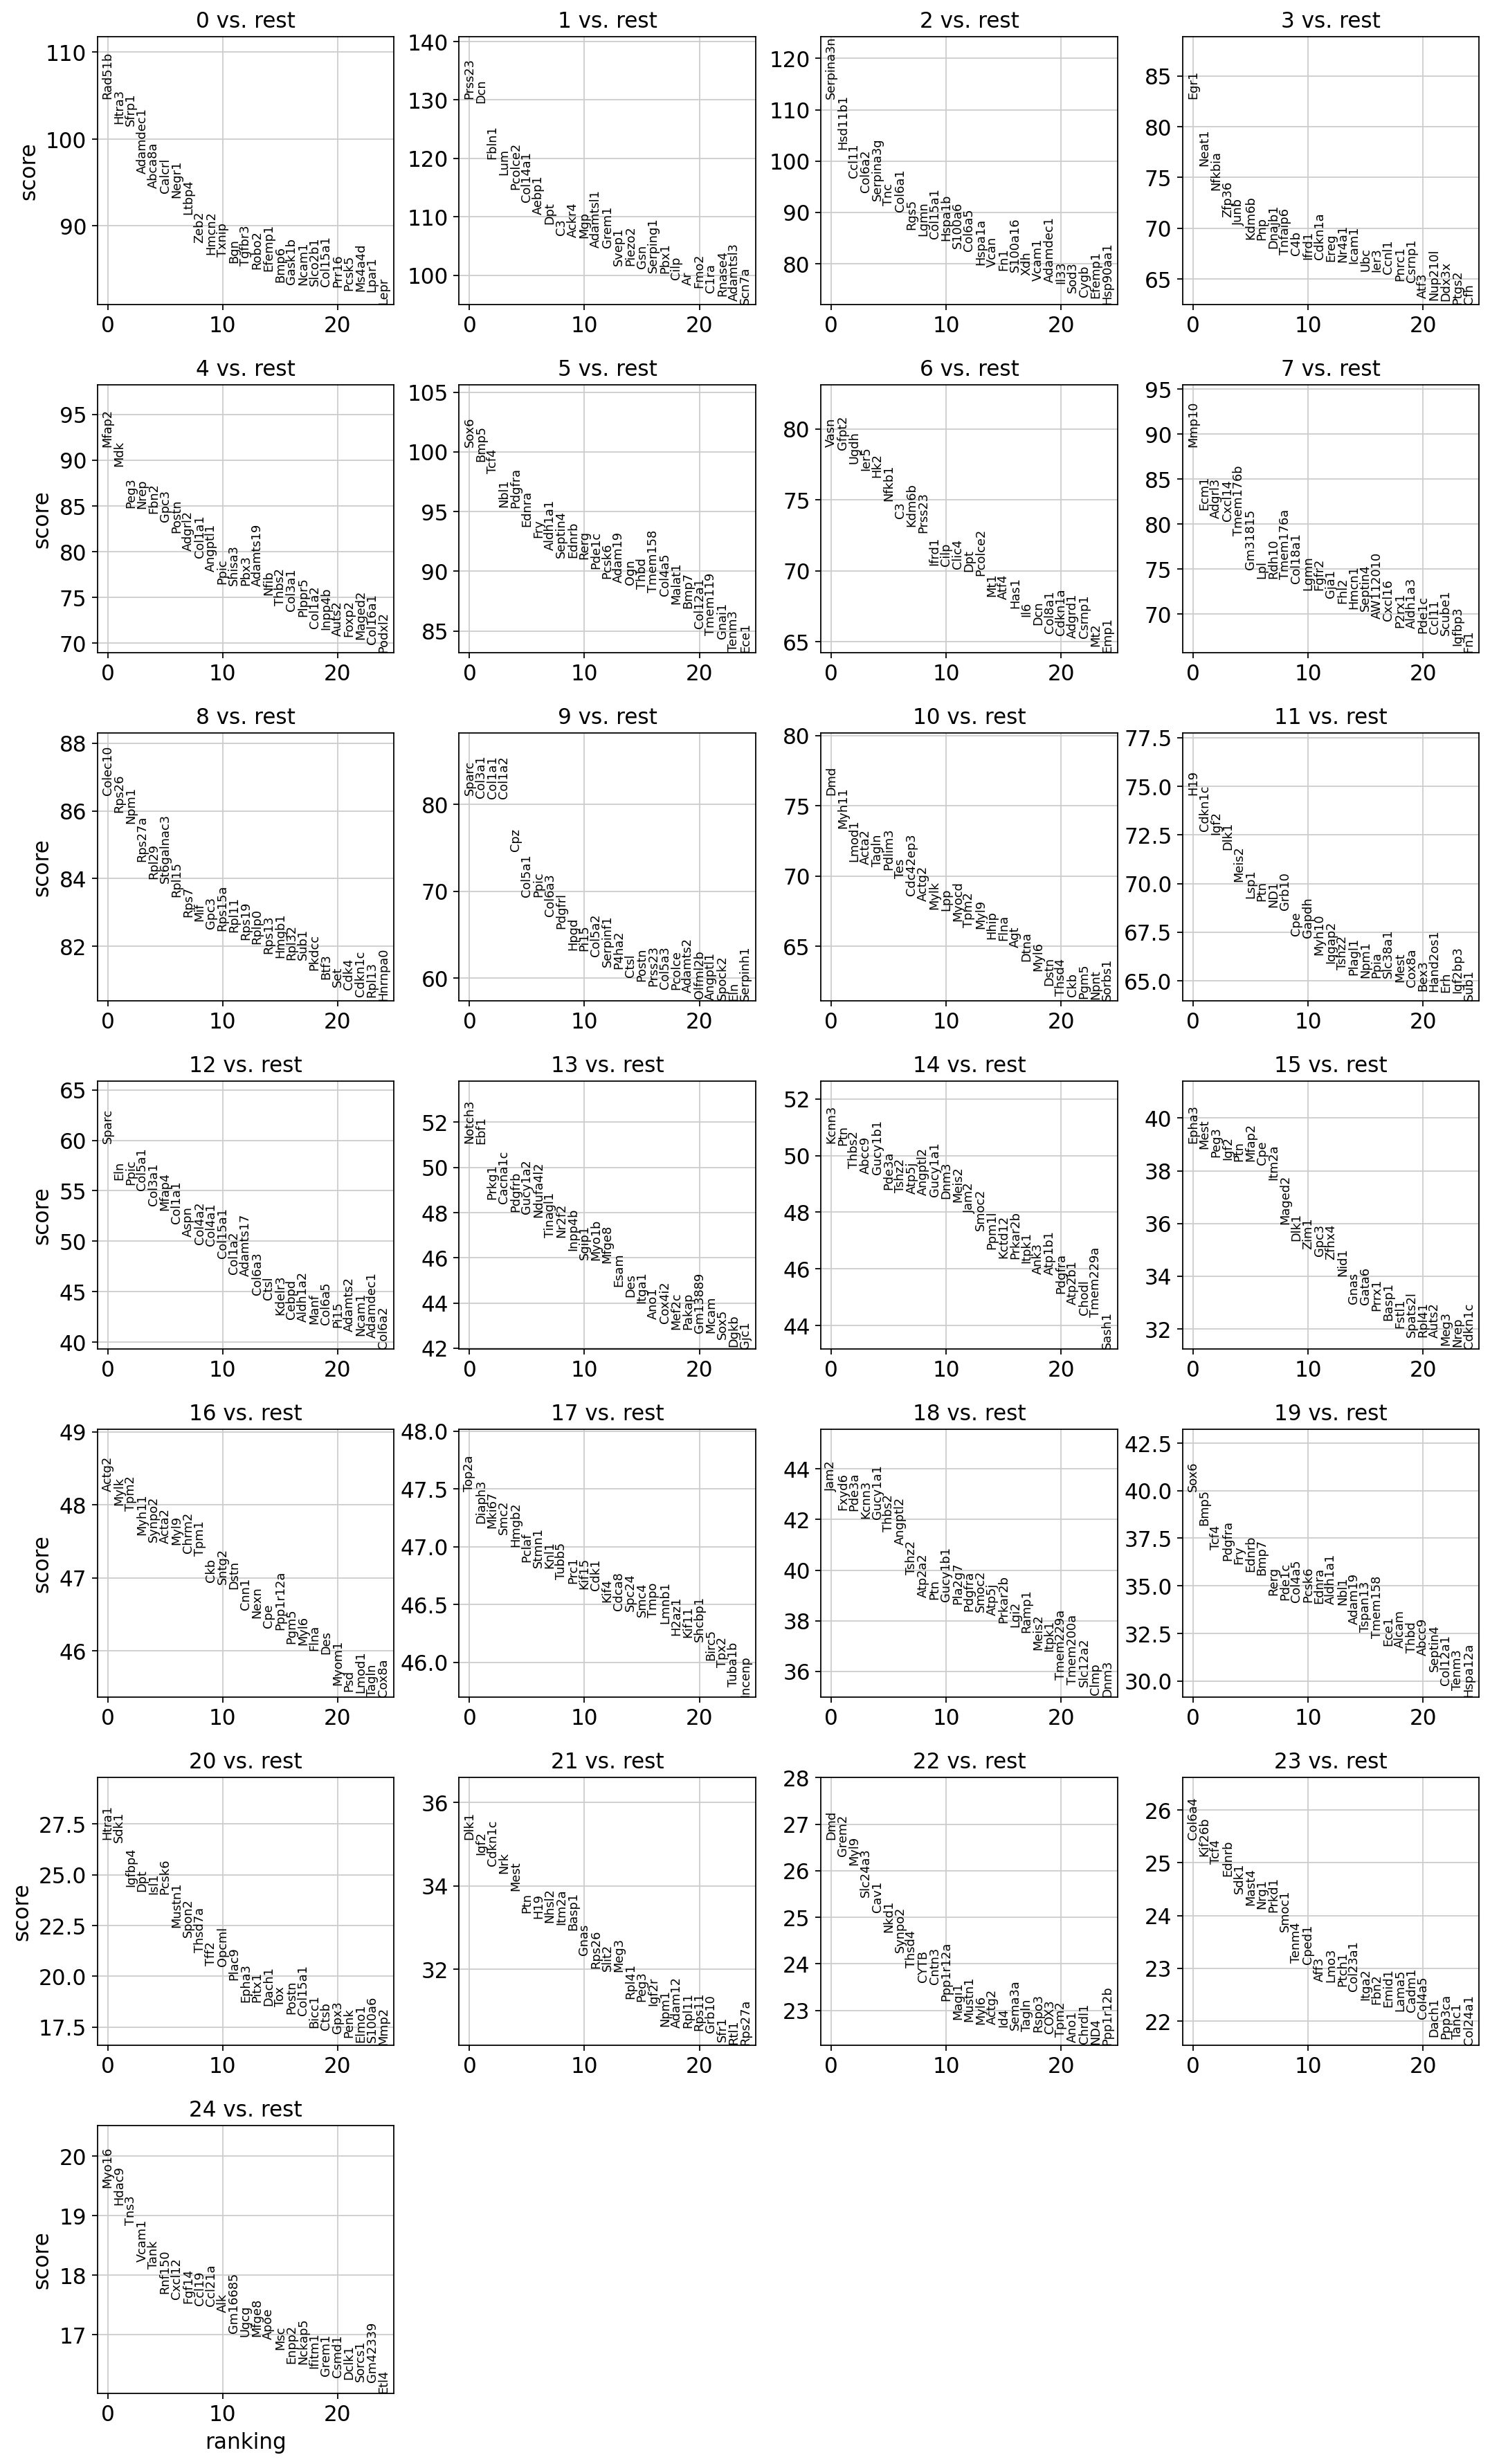

In [41]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


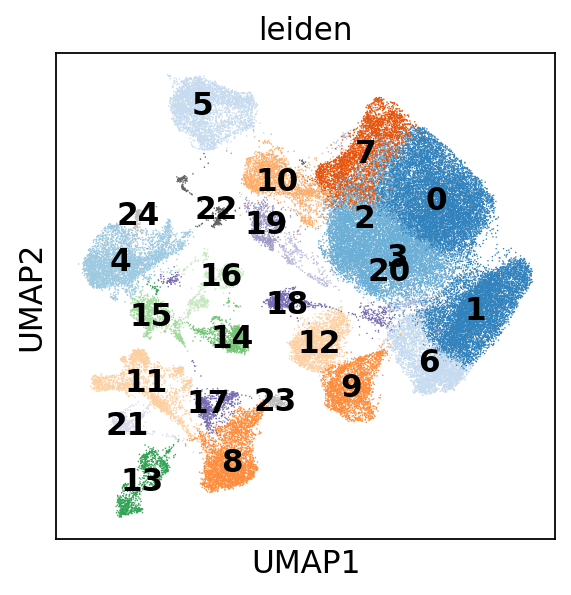

In [46]:
sc.pl.umap(adata, color = "leiden", use_raw=False, legend_loc='on data')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


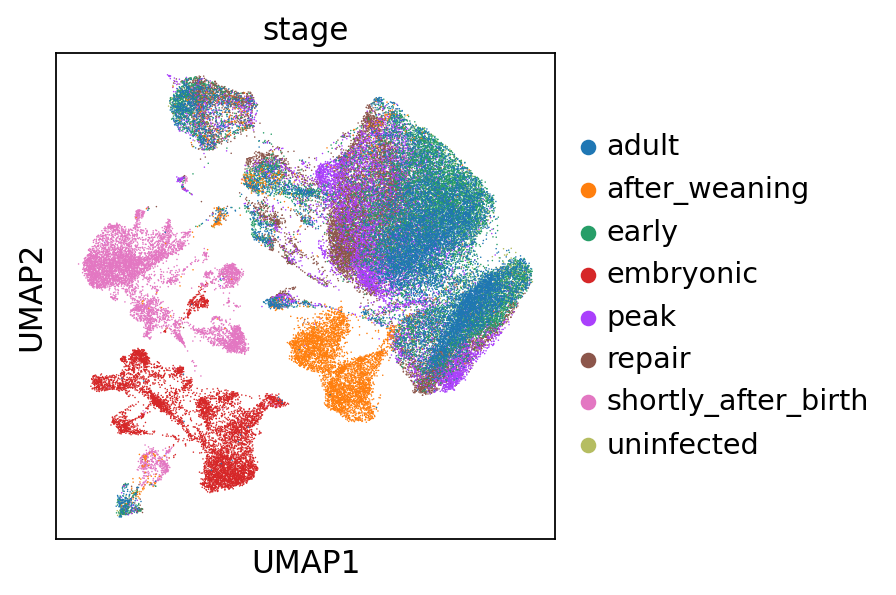

In [49]:
sc.pl.umap(adata, color = "stage", use_raw=False)

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


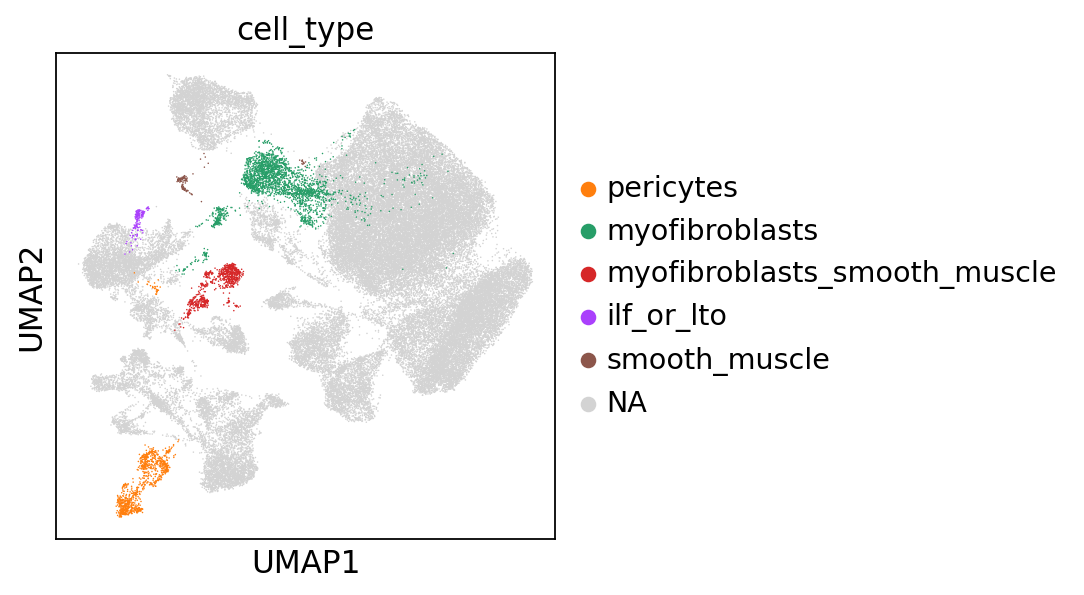

In [50]:
sc.pl.umap(adata, color = "cell_type", use_raw=False)

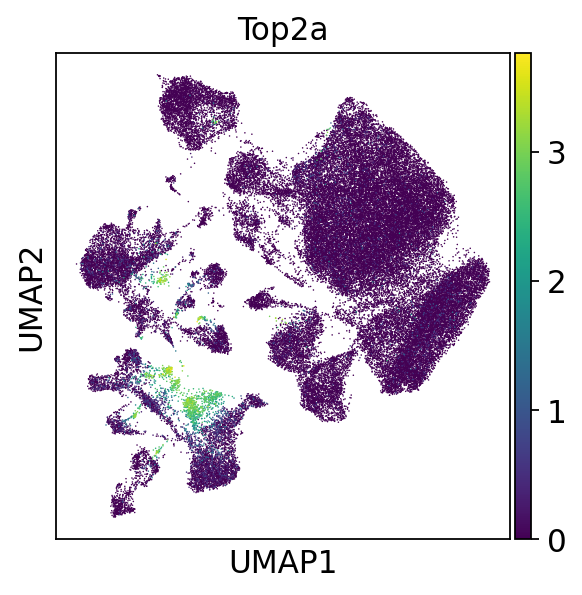

In [184]:
sc.pl.umap(adata, color = "Top2a", use_raw=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


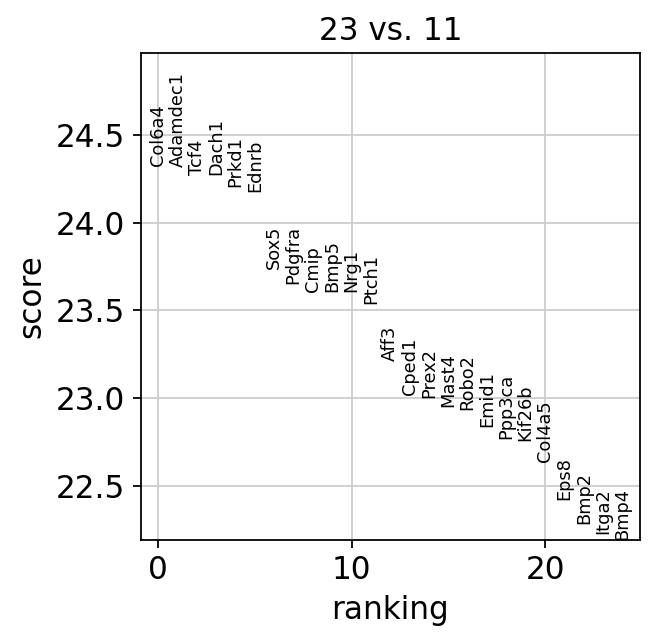

In [177]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False, groups = ['23'], reference = '11')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [145]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Adamdec1+_1'])

# Define the clusters of interest
clusters_of_interest = {'0'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Adamdec1+_1'

In [146]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Adamdec1+_2'])

# Define the clusters of interest
clusters_of_interest = {'2'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Adamdec1+_2'

In [147]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Adamdec1+_3'])

# Define the clusters of interest
clusters_of_interest = {'3'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Adamdec1+_3'

In [148]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Adamdec1+_4'])

# Define the clusters of interest
clusters_of_interest = {'7'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Adamdec1+_4'

In [149]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Adamdec1+_5'])

# Define the clusters of interest
clusters_of_interest = {'20'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Adamdec1+_5'

In [150]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Prss23+_1'])

# Define the clusters of interest
clusters_of_interest = {'1'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Prss23+_1'

In [151]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Prss23+_2'])

# Define the clusters of interest
clusters_of_interest = {'6'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Prss23+_2'

In [152]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Sox6+_Bmp5+_Fbln1-'])

# Define the clusters of interest
clusters_of_interest = {'5'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Sox6+_Bmp5+_Fbln1-'

In [153]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Adult_Sox6+_Bmp5+_Fbln1+'])

# Define the clusters of interest
clusters_of_interest = {'19'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Adult_Sox6+_Bmp5+_Fbln1+'

In [154]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['NWB_Zeb2+'])

# Define the clusters of interest
clusters_of_interest = {'4'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'NWB_Zeb2+'

In [169]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['NWB_Jam2+_PdgfraHI'])

# Define the clusters of interest
clusters_of_interest = {'14'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'NWB_Jam2+_PdgfraHI'

In [156]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['NWB_Cpe+_Igf2+'])

# Define the clusters of interest
clusters_of_interest = {'15'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'NWB_Cpe+_Igf2+'

In [168]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Jam2+Pdgfra+'])

# Define the clusters of interest
clusters_of_interest = {'18'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Jam2+Pdgfra+'

In [158]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['AW_Adamdec1+'])

# Define the clusters of interest
clusters_of_interest = {'12'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'AW_Adamdec1+'

In [159]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['AW_Prss23+'])

# Define the clusters of interest
clusters_of_interest = {'9'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'AW_Prss23+'

In [160]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Emb_Cpe+_Igf2+'])

# Define the clusters of interest
clusters_of_interest = {'11'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Emb_Cpe+_Igf2+'

In [161]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Emb_Zeb2+_1'])

# Define the clusters of interest
clusters_of_interest = {'8'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Emb_Zeb2+_1'

In [162]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Emb_Zeb2+_2'])

# Define the clusters of interest
clusters_of_interest = {'17'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Emb_Zeb2+_2'

In [163]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Emb_Plac9+_Anxa2+'])

# Define the clusters of interest
clusters_of_interest = {'21'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Emb_Plac9+_Anxa2+'

In [179]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Emb_PdgfraHI'])

# Define the clusters of interest
clusters_of_interest = {'23'}

# Use the isin method to create a boolean mask of the cells that are in the clusters of interest
mask = adata.obs['leiden'].isin(clusters_of_interest)

# Update the 'cell_type' column based on the mask
adata.obs.loc[mask, 'cell_type'] = 'Emb_PdgfraHI'

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


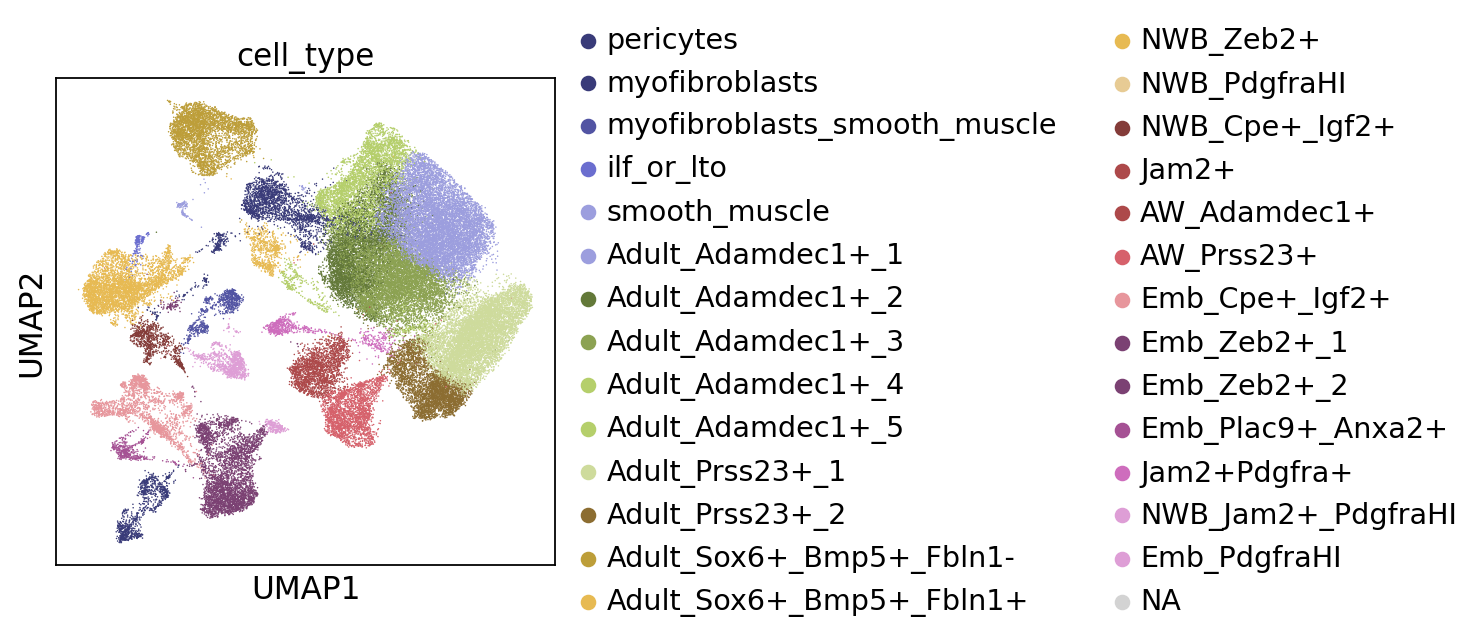

In [182]:
sc.pl.umap(adata, color = "cell_type", use_raw=False, palette = "tab20b")

In [185]:
adata.write_h5ad("/vol/ExtraVol/whole_data_fully_cleaned_annotated.h5ad") 

In [181]:
print(adata.obs['cell_type'].cat.categories)

Index(['pericytes', 'myofibroblasts', 'myofibroblasts_smooth_muscle',
       'ilf_or_lto', 'smooth_muscle', 'Adult_Adamdec1+_1', 'Adult_Adamdec1+_2',
       'Adult_Adamdec1+_3', 'Adult_Adamdec1+_4', 'Adult_Adamdec1+_5',
       'Adult_Prss23+_1', 'Adult_Prss23+_2', 'Adult_Sox6+_Bmp5+_Fbln1-',
       'Adult_Sox6+_Bmp5+_Fbln1+', 'NWB_Zeb2+', 'NWB_PdgfraHI',
       'NWB_Cpe+_Igf2+', 'Jam2+', 'AW_Adamdec1+', 'AW_Prss23+',
       'Emb_Cpe+_Igf2+', 'Emb_Zeb2+_1', 'Emb_Zeb2+_2', 'Emb_Plac9+_Anxa2+',
       'Jam2+Pdgfra+', 'NWB_Jam2+_PdgfraHI', 'Emb_PdgfraHI'],
      dtype='object')


In [15]:
adata.uns['iroot'] = np.flatnonzero((adata.obs['stage'] == 'embryonic'))[0]

In [16]:
sc.tl.dpt(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99942213 0.9990795  0.99813217 0.99777526 0.9974661
     0.99697244 0.996649   0.9964346  0.99495906 0.9946255  0.9939079
     0.99279696 0.99260426 0.9921751 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:02)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


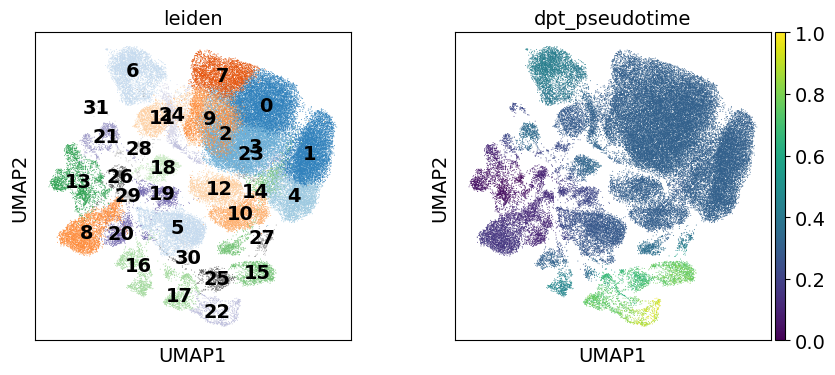

In [17]:
sc.pl.umap(adata, color=['leiden', 'dpt_pseudotime'], legend_loc='on data')

--> added 'pos', the PAGA positions (adata.uns['paga'])


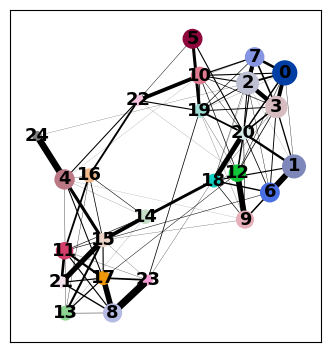

In [38]:
sc.pl.paga(adata, color=['leiden'])

In [23]:
# Define the stage annotations for the first subset
stages_infection_subset = {'adult', 'peak', 'repair', 'early', 'uninfected'}

# Create a boolean mask for the first subset
mask_infection_subset = adata.obs['stage'].isin(stages_infection_subset)

# Subset the AnnData object to create the first dataset
adata_infection_subset = adata[mask_infection_subset].copy()

# Define the stage annotations for the second subset
stages_development_subset = {'uninfected', 'adult', 'after_weaning', 'embryonic', 'shortly_after_birth'}

# Create a boolean mask for the second subset
mask_development_subset = adata.obs['stage'].isin(stages_development_subset)

# Subset the AnnData object to create the second dataset
adata_development_subset = adata[mask_development_subset].copy()

In [24]:
print(adata_infection_subset.obs["stage"])
print(adata_development_subset.obs["stage"])

AAACCCAAGTATCTGC-1_1_1_1    uninfected
AAACCCACATGACTGT-1_1_1_1    uninfected
AAACGCTGTACAGAGC-1_1_1_1    uninfected
AAAGGATTCCAAACCA-1_1_1_1    uninfected
AAAGGGCAGTCTACCA-1_1_1_1    uninfected
                               ...    
TTTGTTGGTCACTAGT-1_2_2_2         adult
TTTGTTGTCACATCAG-1_2_2_2         adult
TTTGTTGTCAGGACGA-1_2_2_2         adult
TTTGTTGTCCCATAAG-1_2_2_2         adult
TTTGTTGTCTGGTGCG-1_2_2_2         adult
Name: stage, Length: 45215, dtype: category
Categories (5, object): ['adult', 'early', 'peak', 'repair', 'uninfected']
AAACCCAAGTATCTGC-1_1_1_1    uninfected
AAACCCACATGACTGT-1_1_1_1    uninfected
AAACGCTGTACAGAGC-1_1_1_1    uninfected
AAAGGATTCCAAACCA-1_1_1_1    uninfected
AAAGGGCAGTCTACCA-1_1_1_1    uninfected
                               ...    
TTTGTTGGTCACTAGT-1_2_2_2         adult
TTTGTTGTCACATCAG-1_2_2_2         adult
TTTGTTGTCAGGACGA-1_2_2_2         adult
TTTGTTGTCCCATAAG-1_2_2_2         adult
TTTGTTGTCTGGTGCG-1_2_2_2         adult
Name: stage, Length: 30

In [25]:
adata.write_h5ad("/vol/ExtraVol/whole_data_fully_cleaned.h5ad") 
adata_infection_subset.write_h5ad("/vol/ExtraVol/infection_subset_fully_cleaned.h5ad") 
adata_development_subset.write_h5ad("/vol/ExtraVol/development_subset_fully_cleaned.h5ad") 

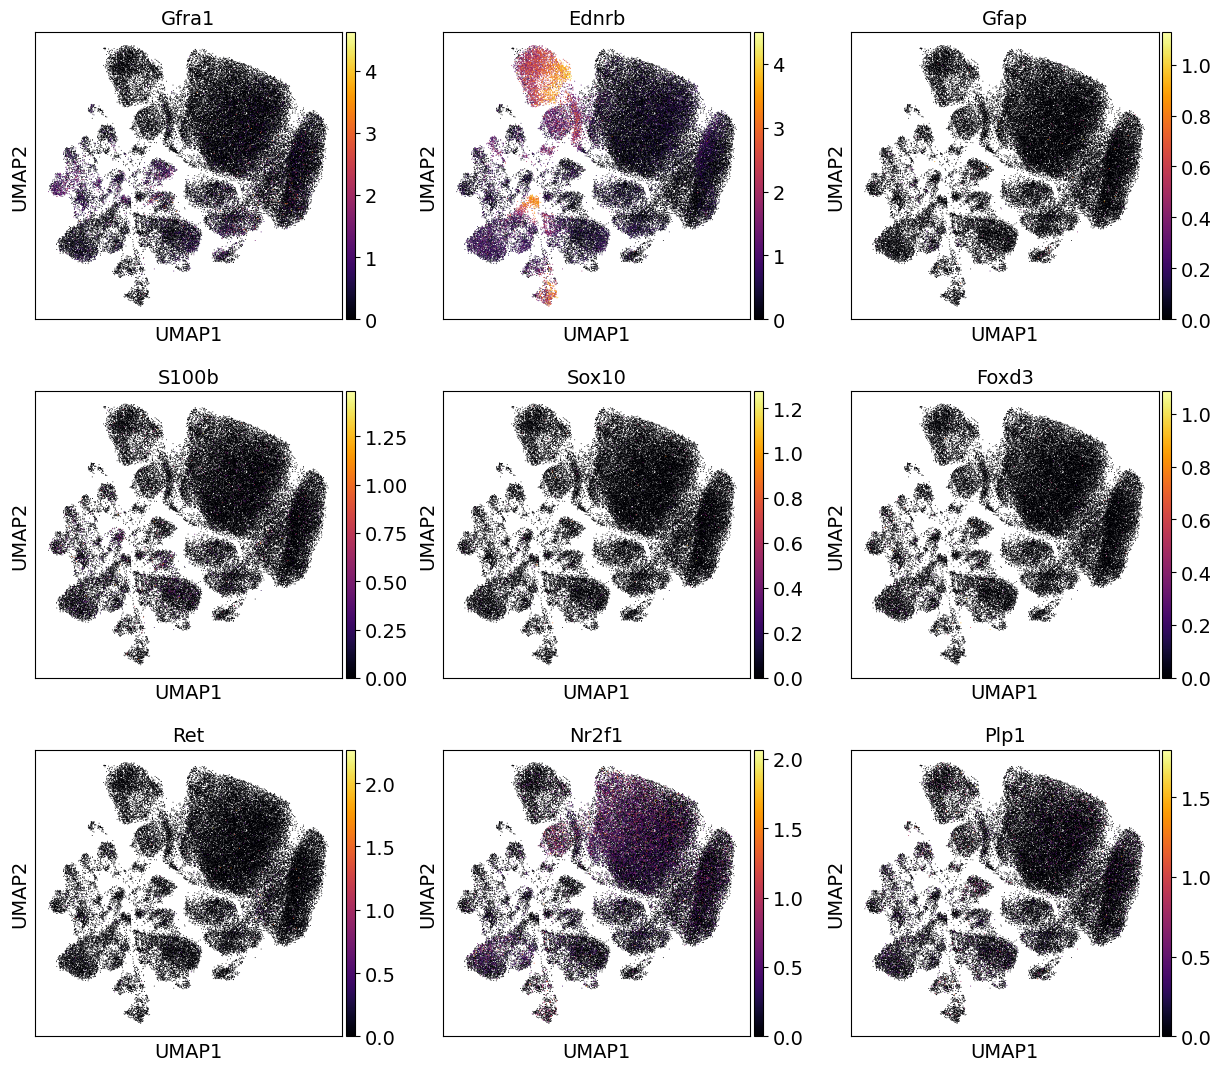

In [26]:
sc.pl.umap(adata, color = ["Gfra1", "Ednrb", "Gfap", "S100b", "Sox10", "Foxd3", "Ret", "Nr2f1", "Plp1"], use_raw=False, cmap = "inferno", ncols=3)

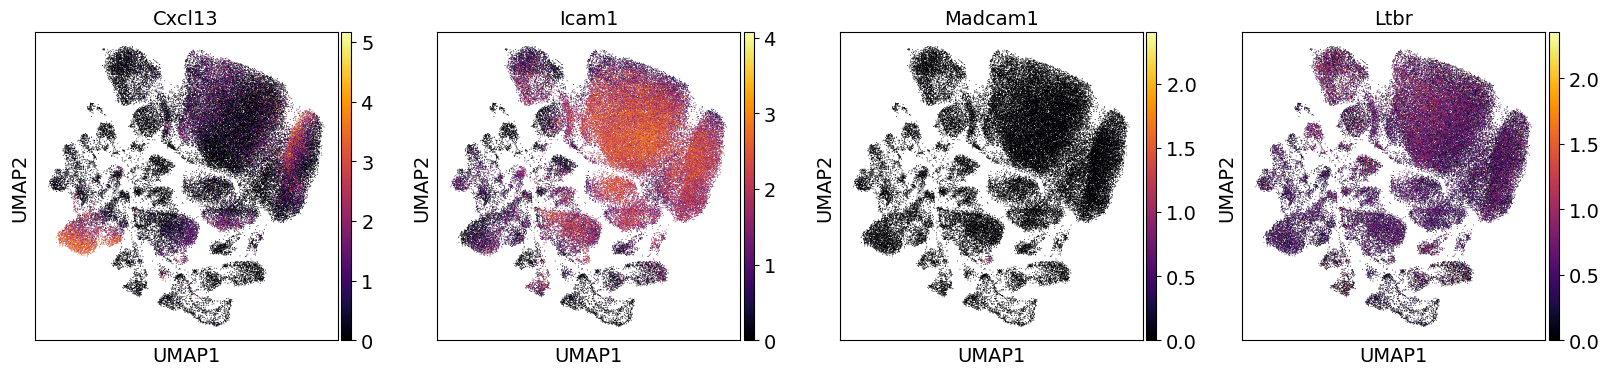

In [15]:
sc.pl.umap(adata, color = ["Cxcl13", "Icam1", "Madcam1", "Ltbr"], use_raw=False, cmap = "inferno", ncols=4)

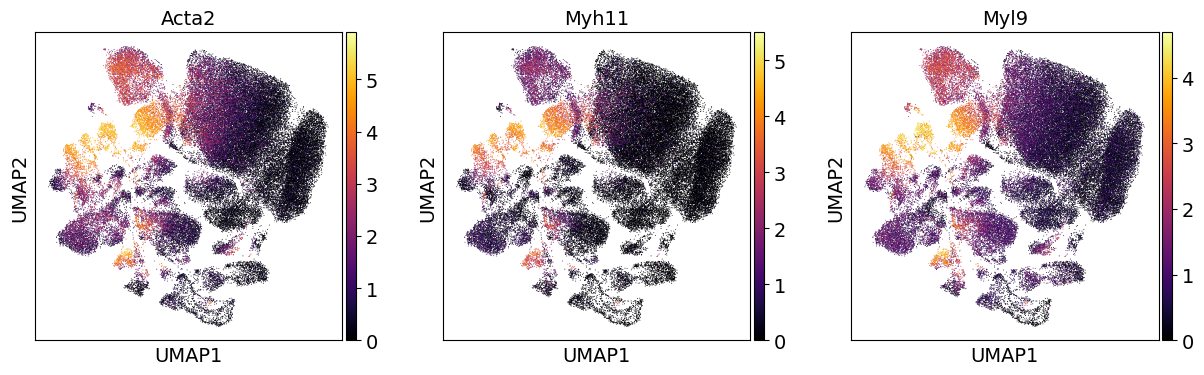

In [16]:
sc.pl.umap(adata, color = ["Acta2", "Myh11", "Myl9"], use_raw=False, cmap = "inferno", ncols=3)

In [14]:
adata.var['ribo'] = adata.var_names.str.startswith(('Rps', 'Rpl'))  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo'], percent_top=None, log1p=False, inplace=True, use_raw=True)

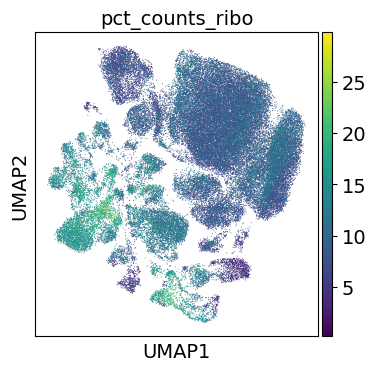

In [15]:
sc.pl.umap(adata, color = "pct_counts_ribo", use_raw=False)

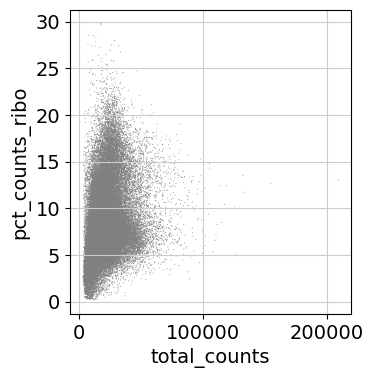

In [17]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')

In [7]:
diff_exp = pd.read_csv("/vol/ExtraVol/diff_exp_wilcox_subset.csv", sep = ",")

In [8]:
diff_exp

Unnamed: 0  group    names      scores  logfoldchanges         pvals  \
0              1      0    Sfrp1  101.198380        1.758150  0.000000e+00   
1              2      0    Htra3   96.667030        1.569283  0.000000e+00   
2              3      0    Ltbp4   94.198494        1.318005  0.000000e+00   
3              4      0   Calcrl   93.225670        1.947066  0.000000e+00   
4              5      0   Tgfbr3   91.552670        1.400939  0.000000e+00   
...          ...    ...      ...         ...             ...           ...   
1595        1596     31     Nfib  -14.679620       -2.400716  8.707792e-49   
1596        1597     31  Epb41l2  -14.667961       -2.895875  1.034065e-48   
1597        1598     31   Col4a1  -14.666665       -2.332758  1.054000e-48   
1598        1599     31     Egr1  -14.638651       -3.445507  1.591953e-48   
1599        1600     31     Aspn  -14.595370       -4.126818  3.005782e-48   

         pvals_adj   rank  
0     0.000000e+00      1  
1     0.000000e+00      2  
2     0.000000e+00      3  
3     0.000000e+00      4  
4     0.000000e+00      5  
...            ...    ...  
1595  3.122507e-46  40858  
1596  3.666439e-46  40857  
1597  3.682605e-46  40856  
1598  5.468693e-46  40855  
1599  1.015482e-45  40854  

[1600 rows x 8 columns]

In [17]:
output_directory = "/vol/ExtraVol/umap_plots_ClusterMarkers/"

# Group the "diff_exp" DataFrame by "group"
grouped = diff_exp.groupby("group")

# Loop through the groups
for group, group_df in grouped:
    # Extract all "names" in the group as a list
    gene_list = group_df["names"].tolist()
    png_filename = os.path.join(output_directory, f"umap_plot_cluster_{group}.png")
    
    with plt.rc_context({'figure.dpi': 50}):  # Use this to set figure params like size and dpi
        sc.pl.umap(adata, color=gene_list, use_raw=False, cmap="inferno", show=False, ncols = 10)
        plt.savefig(png_filename, bbox_inches="tight")
        # Clear the current plot
        plt.clf()

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:470: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pl.figure(


<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>

<Figure size 2415x1000 with 0 Axes>